In [ ]:
import numpy as np
import gensim
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors
from collections import Counter
import re, nltk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud, STOPWORDS
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import copy
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
# import gensim.downloader as api
# wv = api.load('word2vec-google-news-300')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Reading and Preprocessing
## Steps


*   Take mean
*   Removed unnecessary strings

*   Remove stop words
*   Convert string to list

## Things to try
- can use both pretrained and custom ones
- Add word cloud
- add smote
- Feature selection







In [ ]:
"""
- Reading Data 
- Taking mean
 """
mydata1 = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Project/toxicity_annotated_comments.tsv')
mydata2 = pd.read_table('/content/drive/MyDrive/Colab Notebooks/Project/toxicity_annotations.tsv')
labels = mydata2.groupby('rev_id')['toxicity_score'].mean() < 0
data = mydata1.merge(labels, how = 'left', on = 'rev_id')
data['toxicity'] = np.where(data['toxicity_score'] == True , 1, 0)
data

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score,toxicity
0,2232.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,False,0
1,4216.0,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train,False,0
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test,False,0
3,26547.0,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train,False,0
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test,False,0
...,...,...,...,...,...,...,...,...,...
159681,699848324.0,`NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENThese ...,2016,True,article,blocked,train,False,0
159682,699851288.0,NEWLINE_TOKENNEWLINE_TOKENThe Institute for Hi...,2016,True,article,blocked,test,False,0
159683,699857133.0,NEWLINE_TOKEN:The way you're trying to describ...,2016,True,article,blocked,dev,False,0
159684,699891012.0,NEWLINE_TOKENNEWLINE_TOKEN== Warning ==NEWLINE...,2016,True,user,blocked,train,True,1


In [ ]:
""" Data Preprocessing """
stop = stopwords.words('english')
data['comment'] = data['comment'].str.replace("NEWLINE_TOKEN", " ",regex = True)
data['comment'] = data['comment'].str.replace("TAB_TOKEN", " ",regex = True)
data['comment'] = data['comment'].str.replace('[^a-zA-Z ]', ' ')
data['comments'] = data['comment'].str.lower().str.strip().str.split(" ")
data['without_stop_words'] = data['comments'].apply(lambda x: [item for item in x if (item not in stop) and (item != "")])
data

<ipython-input-18-999cf705c042>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['comment'] = data['comment'].str.replace('[^a-zA-Z ]', ' ')


,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score,toxicity,comments,without_stop_words
0,2232.0,This One can make an analogy in mathematical...,2002,True,article,random,train,False,0,"[this, , , one, can, make, an, analogy, in, ma...","[one, make, analogy, mathematical, terms, envi..."
1,4216.0,Clarification for you and Zundark s righ...,2002,True,user,random,train,False,0,"[clarification, for, you, , , and, zundark, s,...","[clarification, zundark, right, checked, wikip..."
2,8953.0,Elected or Electoral JHK,2002,False,article,random,test,False,0,"[elected, or, electoral, , jhk]","[elected, electoral, jhk]"
3,26547.0,This is such a fun entry Devotchka I once...,2002,True,article,random,train,False,0,"[this, is, such, a, fun, entry, , , , devotchk...","[fun, entry, devotchka, coworker, korea, tell,..."
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test,False,0,"[please, relate, the, ozone, hole, to, increas...","[please, relate, ozone, hole, increases, cance..."
...,...,...,...,...,...,...,...,...,...,...,...
159681,699848324.0,These sources don t exactly exude a sense ...,2016,True,article,blocked,train,False,0,"[these, sources, don, t, exactly, exude, a, se...","[sources, exactly, exude, sense, impartiality,..."
159682,699851288.0,The Institute for Historical Review is a pee...,2016,True,article,blocked,test,False,0,"[the, institute, for, historical, review, is, ...","[institute, historical, review, peer, reviewed..."
159683,699857133.0,The way you re trying to describe it in this...,2016,True,article,blocked,dev,False,0,"[the, way, you, re, trying, to, describe, it, ...","[way, trying, describe, article, serious, step..."
159684,699891012.0,Warning There is clearly a protection...,2016,True,user,blocked,train,True,1,"[warning, , , , , there, is, clearly, a, prote...","[warning, clearly, protectionist, regime, goin..."


In [ ]:
""" Code for pretrained model """
# vocab_data = []
# for i in data['without_stop_words']:
#   for x in i:
#     vocab_data.append(x)
# len(vocab_data)
# vocab_model = wv.index2word
# vocab = list(set(vocab_data) & set(vocab_model))
# len(vocab)
# data_dict = data.to_dict('records')
# for r in data_dict:
#   if r['without_stop_words'] == []:
#     r

' Code for pretrained model '

In [ ]:
""" Dropping rows where we had no feature i.e. without_stop_words list was empty """
index_names = data[data['without_stop_words'].apply(lambda x: len(x)) == 0 ].index    
data.drop(index_names, inplace = True)
data.reset_index(inplace = True)

In [ ]:
vocab_sentences = list(data['without_stop_words'])
word_cloud = ""
for i in vocab_sentences:
  word_cloud += " ".join(i)+" "

## Word Cloud

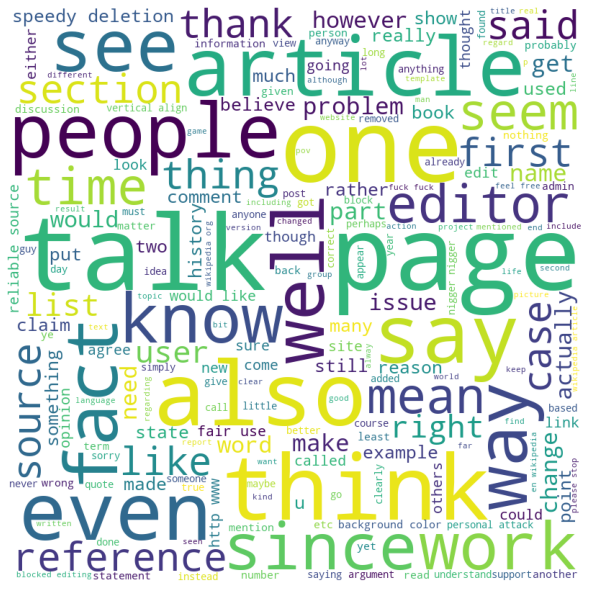

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(word_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Training Word2Vec model

In [ ]:
model = Word2Vec(vocab_sentences, min_count=1, size=300, workers = 4)
model.save('/content/drive/MyDrive/Colab Notebooks/Project/mymodel')

In [ ]:
""" Changing words to vector space, taking average to get embedding for the sentence """
data['vectors'] = data['without_stop_words'].apply(lambda x: [model[item] for item in x])
data['final_vector'] = data['vectors'].apply(lambda x: [sum(x)/len(x)])
data

<ipython-input-24-854f23b3b57e>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data['vectors'] = data['without_stop_words'].apply(lambda x: [model[item] for item in x])


,index,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score,toxicity,comments,without_stop_words,vectors,final_vector
0,0,2232.0,This One can make an analogy in mathematical...,2002,True,article,random,train,False,0,"[this, , , one, can, make, an, analogy, in, ma...","[one, make, analogy, mathematical, terms, envi...","[[0.85858953, 1.0838298, 0.078026876, 0.100786...","[[0.057672136, -0.27273944, 0.32248107, -0.037..."
1,1,4216.0,Clarification for you and Zundark s righ...,2002,True,user,random,train,False,0,"[clarification, for, you, , , and, zundark, s,...","[clarification, zundark, right, checked, wikip...","[[-0.50369745, -0.29417345, 0.4163914, 0.25282...","[[0.10186825, -0.24184085, 0.373431, 0.1180410..."
2,2,8953.0,Elected or Electoral JHK,2002,False,article,random,test,False,0,"[elected, or, electoral, , jhk]","[elected, electoral, jhk]","[[0.089224465, 0.66613173, 0.36886021, 0.04508...","[[0.07510713, 0.34442106, 0.16755533, -0.06108..."
3,3,26547.0,This is such a fun entry Devotchka I once...,2002,True,article,random,train,False,0,"[this, is, such, a, fun, entry, , , , devotchk...","[fun, entry, devotchka, coworker, korea, tell,...","[[0.17201124, -0.20033097, -0.037769932, 0.696...","[[0.05457061, -0.12755772, 0.19844198, -0.0469..."
4,4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test,False,0,"[please, relate, the, ozone, hole, to, increas...","[please, relate, ozone, hole, increases, cance...","[[-1.1172812, 0.43290964, -0.07164186, 1.62687...","[[0.09239091, -0.2892389, 0.25864768, -0.01392..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159585,159681,699848324.0,These sources don t exactly exude a sense ...,2016,True,article,blocked,train,False,0,"[these, sources, don, t, exactly, exude, a, se...","[sources, exactly, exude, sense, impartiality,...","[[0.16249211, -0.60165834, 0.9016729, 0.226340...","[[0.0030356576, -0.20548373, 0.2800583, 0.0326..."
159586,159682,699851288.0,The Institute for Historical Review is a pee...,2016,True,article,blocked,test,False,0,"[the, institute, for, historical, review, is, ...","[institute, historical, review, peer, reviewed...","[[-0.22495456, 0.32081756, 0.009167846, -0.434...","[[-0.029665368, -0.053842455, 0.10488305, 0.14..."
159587,159683,699857133.0,The way you re trying to describe it in this...,2016,True,article,blocked,dev,False,0,"[the, way, you, re, trying, to, describe, it, ...","[way, trying, describe, article, serious, step...","[[0.20557415, -0.20353973, -0.11118855, -1.027...","[[0.052774597, -0.09366756, 0.21756801, 0.0029..."
159588,159684,699891012.0,Warning There is clearly a protection...,2016,True,user,blocked,train,True,1,"[warning, , , , , there, is, clearly, a, prote...","[warning, clearly, protectionist, regime, goin...","[[0.97687954, 0.113507286, 0.67706007, 0.84126...","[[0.31198072, 0.09798449, 0.17247704, 0.370656..."


In [ ]:
X = np.concatenate( data['final_vector'], axis=0 )
X.shape

(159590, 300)

In [ ]:
data['toxicity'].value_counts()


0    130140
1     29450
Name: toxicity, dtype: int64

# PCA

In [ ]:
X_bkp = X.copy()
pca = PCA(n_components=3)
XX = pca.fit_transform(X)
print(XX.shape)

pca_2 = PCA(n_components=20)
X = pca_2.fit_transform(X)
print(X.shape)

(159590, 3)
(159590, 20)


In [ ]:
y = np.array((data['toxicity']))
colormap = np.array(['r', 'g'])

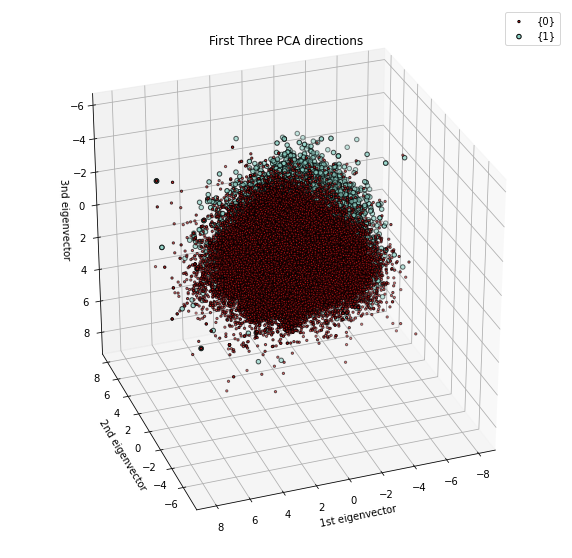

In [ ]:
 fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    XX[np.where(y == 0), 0],
    XX[np.where(y == 0), 1],
    XX[np.where(y == 0), 2],
    c = y[np.where(y == 0)],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=5, label = set(y[np.where(y == 0)])
)

ax.scatter(
    XX[np.where(y == 1), 0],
    XX[np.where(y == 1), 1],
    XX[np.where(y == 1), 2],
    c = y[np.where(y == 1)],
    cmap=plt.cm.Set3,
    edgecolor="k",
    s=20, label = set(y[np.where(y == 1)])
)


ax.set_title("First Three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3nd eigenvector")
ax.legend()
plt.show()

# Models 
## Logistic Regression

accruracy:  0.8747336925872549
f1:  0.5750498206456756
recall:  0.4577217545789095
precision:  0.7732599685579534
auc 0.8843197908175267


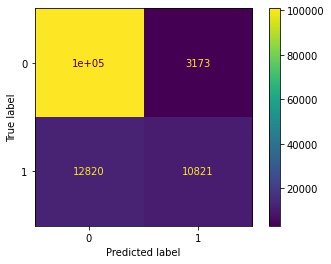

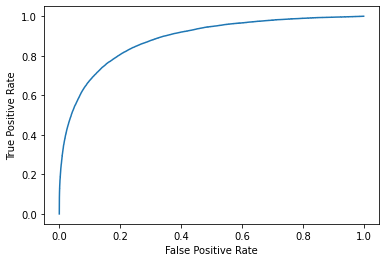

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), random_state=0, test_size = 0.8)
log_reg = LogisticRegression(penalty='l2',solver='saga',random_state=14, max_iter= 100).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


accruracy:  0.8745927063099191
f1:  0.574435850410653
recall:  0.45708726365212976
precision:  0.7728508081819482
auc 0.8839107315835891


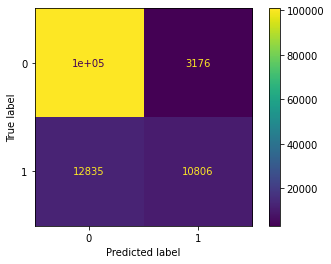

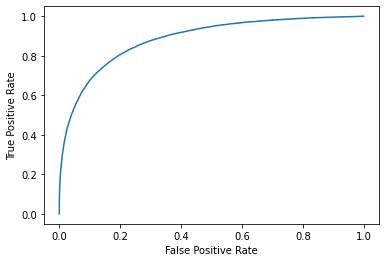

In [ ]:
log_reg = LogisticRegression(penalty='l1',solver='saga',random_state=14, max_iter= 100).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.8746162040228085
f1:  0.5746173469387755
recall:  0.4573410600228417
precision:  0.772782503037667
auc 0.8839044088952164


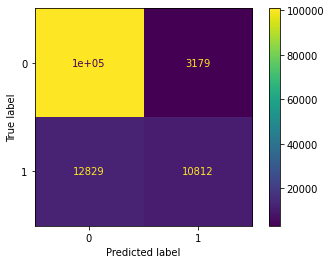

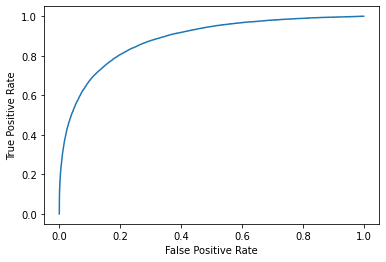

In [ ]:
log_reg = LogisticRegression(penalty='none',solver='saga',random_state=14, max_iter= 100).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## KNN

accruracy:  0.8611911773920672
f1:  0.5789498693276313
recall:  0.5153758301256292
precision:  0.6604151986557537
auc 0.8001316600032382


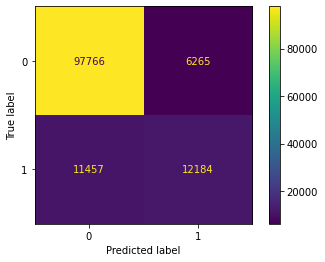

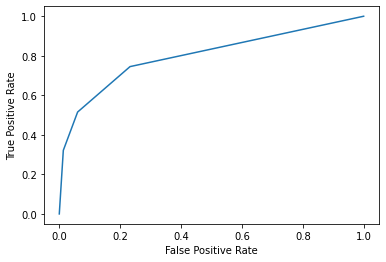

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, neigh.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, neigh.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.8695015351839087
f1:  0.5887695915093175
recall:  0.5045048855801362
precision:  0.7068270712338509
auc 0.8273258549656828


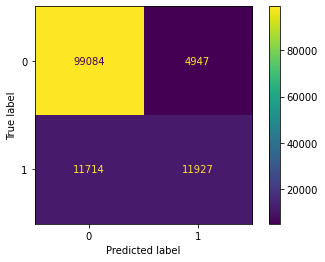

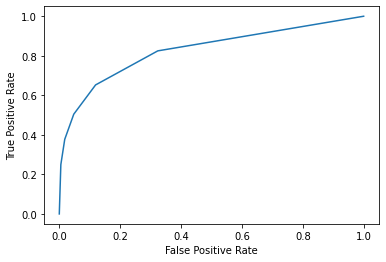

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, neigh.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, neigh.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.872971364120559
f1:  0.593105524612374
recall:  0.49997885030244066
precision:  0.7288647715360425
auc 0.8424494155176958


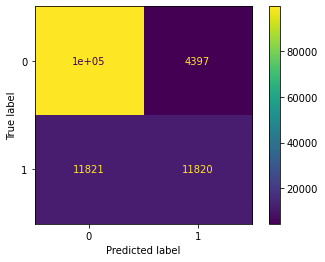

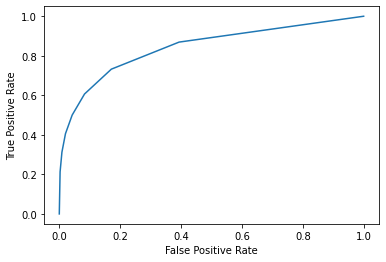

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, neigh.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, neigh.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Naive Bayes

accruracy:  0.8727833824174447
f1:  0.5304151728923326
recall:  0.38801235142337465
precision:  0.837946469352334
auc 0.85145056057933


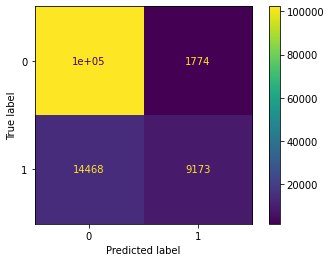

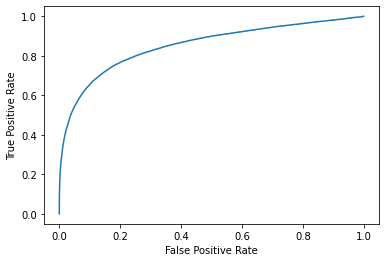

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

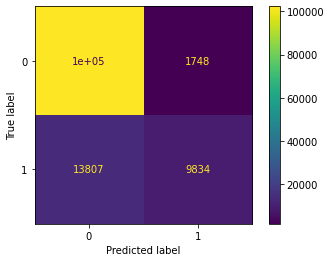

In [ ]:
rf = RandomForestClassifier(max_depth=12,n_estimators = 500, random_state=0)
y_pred = rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

accruracy:  0.8781643586690896
f1:  0.5583851460693298
recall:  0.4159722515968022
precision:  0.8490761526506648
auc 0.8831278983927762


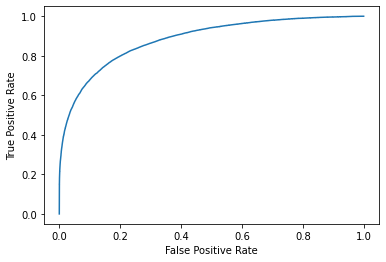

In [ ]:
print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.8771461244438875
f1:  0.6121702148703112
recall:  0.5236242121737659
precision:  0.7367575288656112
auc 0.8807349564201344


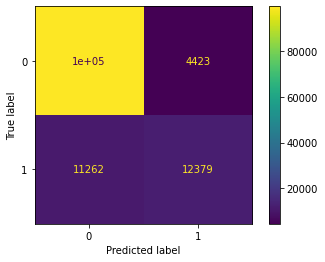

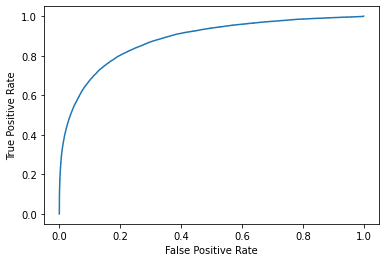

In [ ]:
ada = AdaBoostClassifier(n_estimators=545, random_state=5)
y_pred = ada.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print('accruracy: ',accuracy_score(y_test, y_pred))
print('f1: ' ,f1_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
auc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test, ada.predict_proba(X_test)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


## SMOTE Models
### Logistic regression

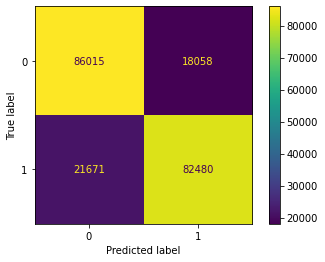

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state=0, test_size = 0.8)
log_reg = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred_res = log_reg.predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()

accruracy:  0.8085379207007838
f1:  0.8054176733289405
recall:  0.7922055477143762
precision:  0.8190779677169575
auc 0.8911940611611551


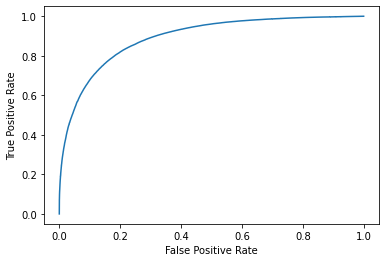

In [ ]:
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, log_reg.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, log_reg.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### KNN

accruracy:  0.8266674350699247
f1:  0.8412924559829736
recall:  0.9184741385104319
precision:  0.7760767801656647
auc 0.8920903811453925


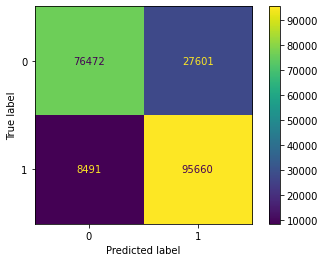

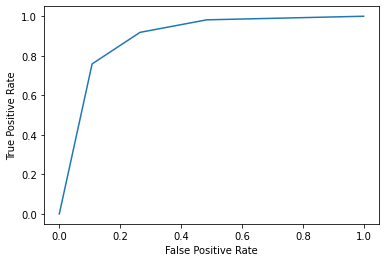

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train_res, y_train_res)
y_pred_res = neigh.predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, neigh.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, neigh.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.8211589442139234
f1:  0.8352205599288475
recall:  0.9061554857850621
precision:  0.7745851184320678
auc 0.9011807981610671


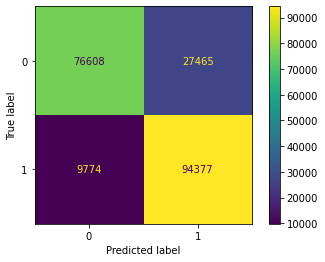

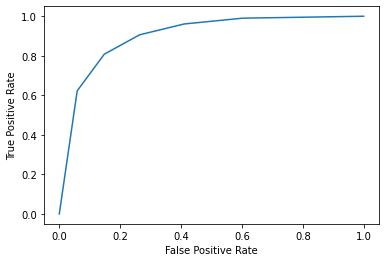

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5).fit(X_train_res, y_train_res)
y_pred_res = neigh.predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, neigh.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, neigh.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.819098662978331
f1:  0.8324526287696824
recall:  0.8984647290952559
precision:  0.7754767173010466
auc 0.9033975969793876


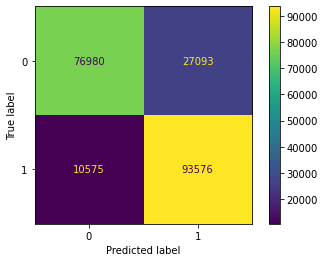

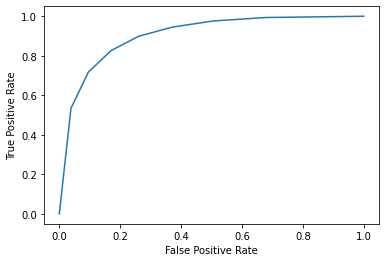

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train_res, y_train_res)
y_pred_res = neigh.predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, neigh.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, neigh.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.7200370754572
f1:  0.749702665916712
recall:  0.8382444719685841
precision:  0.6780787871256369
auc 0.835674845059696


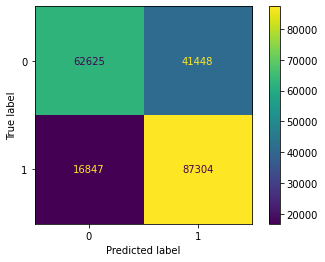

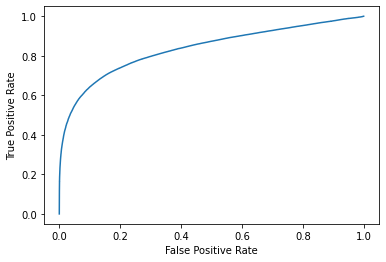

In [ ]:
gnb = GaussianNB()
y_pred_res = gnb.fit(X_train_res, y_train_res).predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, gnb.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, gnb.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.8338760181343169
f1:  0.8325401935486995
recall:  0.8255897687012127
precision:  0.8396086396125454
auc 0.9159202466019123


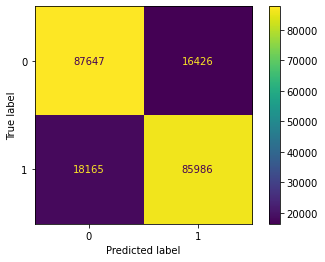

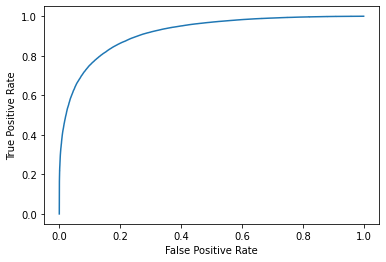

In [ ]:
rf = RandomForestClassifier(max_depth=12, n_estimators = 300, random_state=14)
y_pred_res = rf.fit(X_train_res, y_train_res).predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, rf.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, rf.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

accruracy:  0.816894306131858
f1:  0.8162102492660848
recall:  0.8128678553254409
precision:  0.8195802435671552
auc 0.8981736994663962


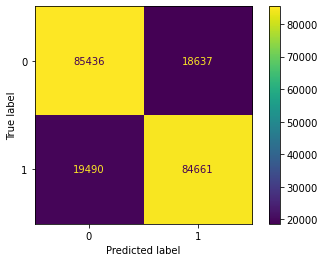

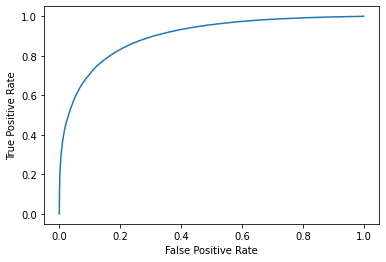

In [ ]:
ada = AdaBoostClassifier(n_estimators = 545, random_state=14)
y_pred_res = ada.fit(X_train_res, y_train_res).predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))
auc = roc_auc_score(y_test_res, ada.predict_proba(X_test_res)[:, 1])
print('auc', auc)
fpr, tpr, _ = metrics.roc_curve(y_test_res, ada.predict_proba(X_test_res)[:, 1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## PCA and SMOTE Models
### Logistic regression

In [ ]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_res)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_pca, y_res, random_state=0, test_size = 0.8)
log_reg = LogisticRegression(random_state=0).fit(X_train_res, y_train_res)
y_pred_res = log_reg.predict(X_test_res)
cm = confusion_matrix(y_test_res, y_pred_res)

cm_display = ConfusionMatrixDisplay(cm).plot()
print('accruracy: ',accuracy_score(y_test_res, y_pred_res))
print('f1: ' ,f1_score(y_test_res, y_pred_res))
print('recall: ', recall_score(y_test_res, y_pred_res))
print('precision: ', precision_score(y_test_res, y_pred_res))